Sentiment Analysis

Importing the required libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [3]:
data = pd.read_csv('/content/twitter_climate_sentiment.csv')

In [11]:
data.head(10)

,sentiment,message
0,-1.0,@tiniebeany climate change is an interesting h...
1,1.0,RT @NatGeoChannel: Watch #BeforeTheFlood right...
2,1.0,Fabulous! Leonardo #DiCaprio's film on #climat...
3,1.0,RT @Mick_Fanning: Just watched this amazing do...
4,0.0,Unamshow awache kujinga na iko global warming ...
5,0.0,RT @AmericanIndian8: Leonardo DiCaprio's clima...
6,1.0,#BeforeTheFlood Watch #BeforeTheFlood right he...
7,1.0,RT @DrDeJarnett: It's vital that the public he...
8,1.0,"Bangladesh did not cause climate change, so th..."
9,1.0,RT @NatGeoChannel: Watch #BeforeTheFlood right...


In [12]:
#Checking if the tweet supports the belief of man-made climate change (Labelled as 1)
data[data['sentiment'] == 1].head(10)

,sentiment,message
1,1.0,RT @NatGeoChannel: Watch #BeforeTheFlood right...
2,1.0,Fabulous! Leonardo #DiCaprio's film on #climat...
3,1.0,RT @Mick_Fanning: Just watched this amazing do...
6,1.0,#BeforeTheFlood Watch #BeforeTheFlood right he...
7,1.0,RT @DrDeJarnett: It's vital that the public he...
8,1.0,"Bangladesh did not cause climate change, so th..."
9,1.0,RT @NatGeoChannel: Watch #BeforeTheFlood right...
10,1.0,Now's the time: we need a strong #FTT that wor...
11,1.0,RT @littoralsociety: The problem with global w...
12,1.0,RT @NatGeoChannel: One of the easiest ways to ...


In [13]:
#Checking if the tweet neither supports nor refutes the belief of man-made climate change (Labelled as 0)
data[data['sentiment'] == 0].head(10)

,sentiment,message
4,0.0,Unamshow awache kujinga na iko global warming ...
5,0.0,RT @AmericanIndian8: Leonardo DiCaprio's clima...
19,0.0,National GeographicÃ¢â‚¬â„¢s climate change do...
23,0.0,@ShellenbergerMD @DrSimEvans @bradplumer @Jiga...
26,0.0,RT @TheFilmStage: Leonardo DiCaprio's climate ...
28,0.0,"if not for climate change information, watch B..."
29,0.0,RT @C__G___: Ã¢â‚¬Å“Niggas asked me what my in...
30,0.0,RT @PlessCatherine: Team energy/climate change...
53,0.0,RT @IndieWire: Watch Leonardo DiCaprio's clima...
60,0.0,@annaa_page I asked my dad to watch this docum...


In [14]:
#Checking if the tweet does not believe in man-made climate change (Labelled as -1)
data[data['sentiment'] == -1].head(10)

,sentiment,message
0,-1.0,@tiniebeany climate change is an interesting h...
16,-1.0,@marie_dunkley arseholes couldn't predict tomo...
107,-1.0,@AngieNBC6 you do understand that climate chan...
253,-1.0,RT @trojan719: Why don't you fucking global wa...
298,-1.0,"RT @realDonaldTrump: It's freezing outside, wh..."
314,-1.0,RT @realDonaldTrump: The concept of global war...
335,-1.0,Man has no significant effect on climate! Henc...
396,-1.0,RT @erinrouxx: 80 degrees in November Ã°Å¸ËœÅ“...
436,-1.0,hmmmm climate change isn't real! https://t.co/...
478,-1.0,@ClimateReality Sorry. I don't believe in clim...


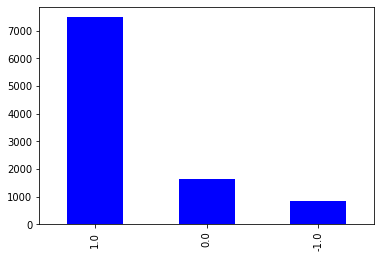

In [15]:
#Checking the distribution of sentiment labels in the data
data['sentiment'].value_counts().plot.bar(color = 'blue', figsize = (6, 4))

In [17]:
#Adding a column to represent the length of the tweet
data['len'] = data['message'].str.len()

data.head(10)

,sentiment,message,len
0,-1.0,@tiniebeany climate change is an interesting h...,137.0
1,1.0,RT @NatGeoChannel: Watch #BeforeTheFlood right...,146.0
2,1.0,Fabulous! Leonardo #DiCaprio's film on #climat...,117.0
3,1.0,RT @Mick_Fanning: Just watched this amazing do...,143.0
4,0.0,Unamshow awache kujinga na iko global warming ...,69.0
5,0.0,RT @AmericanIndian8: Leonardo DiCaprio's clima...,146.0
6,1.0,#BeforeTheFlood Watch #BeforeTheFlood right he...,135.0
7,1.0,RT @DrDeJarnett: It's vital that the public he...,146.0
8,1.0,"Bangladesh did not cause climate change, so th...",158.0
9,1.0,RT @NatGeoChannel: Watch #BeforeTheFlood right...,146.0


In [18]:
data.groupby('sentiment').describe()

len                                                         
            count        mean        std   min    25%    50%    75%    max
sentiment                                                                 
-1.0        861.0  125.512195  24.599941  29.0  117.0  137.0  140.0  166.0
 0.0       1644.0  113.471411  35.025490   7.0   87.0  127.0  140.0  623.0
 1.0       7494.0  130.890713  20.802643  23.0  124.0  139.0  146.0  208.0

Len Count specifies the exact numbers of each sentiment label.



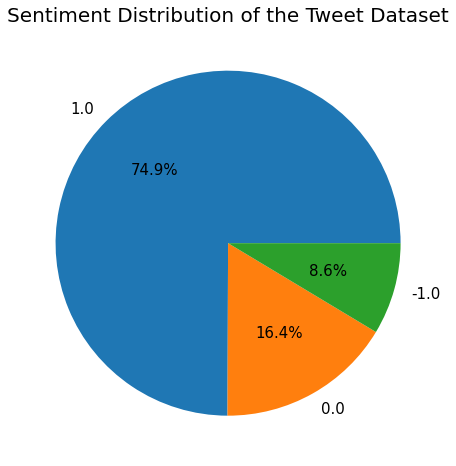

In [22]:
plt.figure(figsize = (7, 7))
plt.pie(data.sentiment.value_counts().values, labels = data.sentiment.value_counts().index, autopct = '%2.1f%%', textprops={'fontsize': 15})
plt.title('Sentiment Distribution of the Tweet Dataset', fontsize=20)
plt.tight_layout()
plt.show()

The pie chart shows the distribution of the data. Majority of tweets are labelled as "1" meaning the positive attitude toward the belief that the climate change is caused by the man-kinds, followed by "0"(neutral), and "-1"(anti).

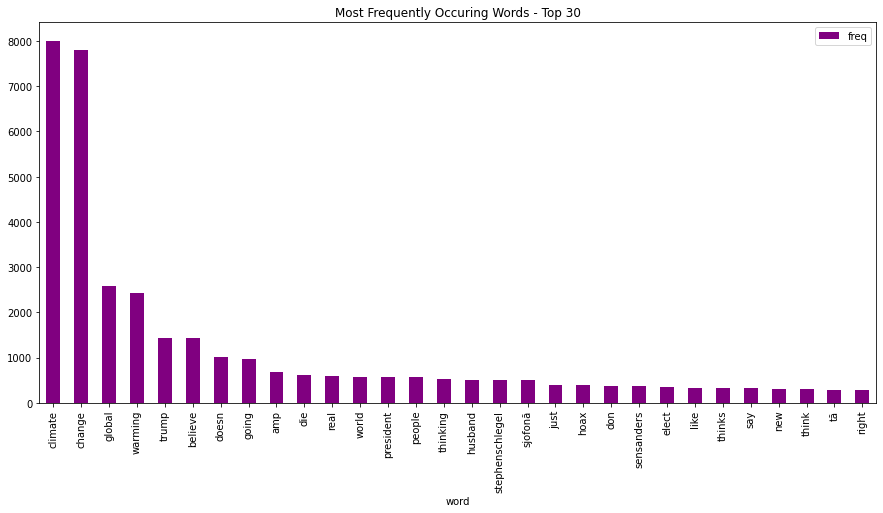

In [51]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
#words = cv.fit_transform(data.message)

words = cv.fit_transform(data['message'].apply(lambda x: np.str_(x)))

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)




frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
frequency= frequency[frequency["word"] != "nan"]
frequency= frequency[frequency["word"] != "rt"]
frequency= frequency[frequency["word"] != "https"]


frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'purple')
plt.title("Most Frequently Occuring Words - Top 30")

frequency.to_csv("word_count.csv")



Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

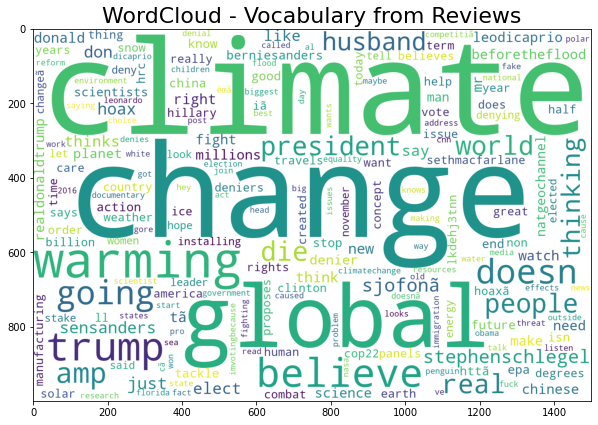

In [50]:
from wordcloud import WordCloud

dict_word= dict(words_freq)
del dict_word['nan']
del dict_word['https']
del dict_word['rt']

wordcloud = WordCloud(background_color = 'white', width = 1500, height = 1000).generate_from_frequencies(dict(dict_word))


plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)